In [37]:
import pandas as pd
import numpy as np


In [161]:
df=pd.read_csv('cleaned_emplyee_data.csv')
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,156,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,169,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,178,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,164,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,160,231,NaN,5000000.0


In [175]:
df["height"]=np.random.randint(150,180,size=len(df))
df[["height",]].head()

,height
0,162
1,155
2,162
3,172
4,169


In [187]:
import matplotlib.pyplot as plt
import seaborn as sns


In [217]:
sns.set(style="darkgrid")
%matplotlib inline

In [215]:
team_summary=pd.DataFrame({
    'Count':team_distribution,
    'Percentage':team_percentage.round(2)
})

print(team_summary)

                        Count  Percentage
Team                                     
New Orleans Pelicans       19        4.15
Memphis Grizzlies          18        3.93
Utah Jazz                  16        3.49
New York Knicks            16        3.49
Milwaukee Bucks            16        3.49
Brooklyn Nets              15        3.28
Portland Trail Blazers     15        3.28
Oklahoma City Thunder      15        3.28
Denver Nuggets             15        3.28
Washington Wizards         15        3.28
Miami Heat                 15        3.28
Charlotte Hornets          15        3.28
Atlanta Hawks              15        3.28
San Antonio Spurs          15        3.28
Houston Rockets            15        3.28
Boston Celtics             15        3.28
Indiana Pacers             15        3.28
Detroit Pistons            15        3.28
Cleveland Cavaliers        15        3.28
Chicago Bulls              15        3.28
Sacramento Kings           15        3.28
Phoenix Suns               15     

C:\Users\User\AppData\Local\Temp\ipykernel_19180\364404242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,y='Team',order=team_distribution.index,palette='magma')


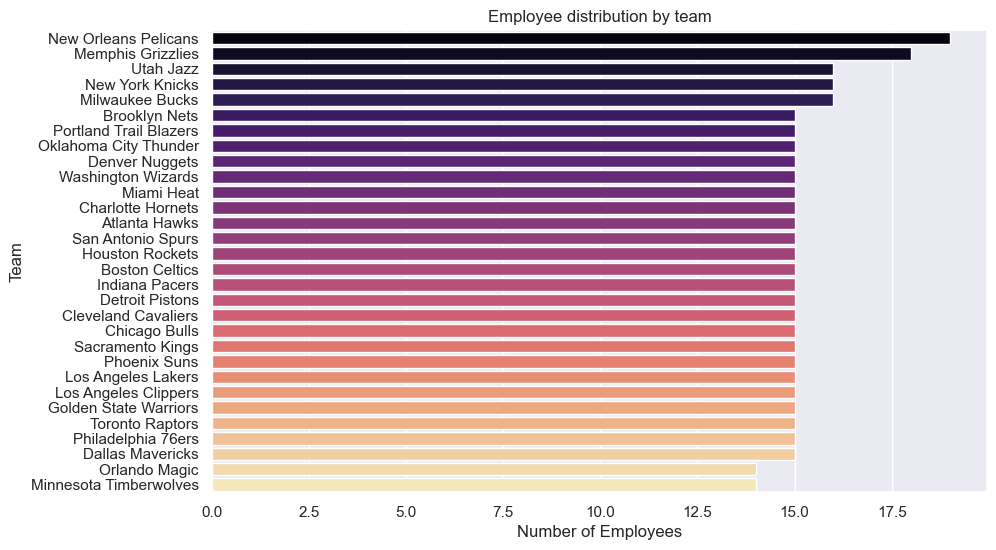

In [277]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,y='Team',order=team_distribution.index,palette='magma')
plt.title("Employee distribution by team")
plt.xlabel('Number of Employees')
plt.ylabel('Team')
plt.show()


In [253]:
position_counts=df['Position'].value_counts()
print(position_counts)

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_19180\2365836499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Position',order=position_counts.index,palette='mako')


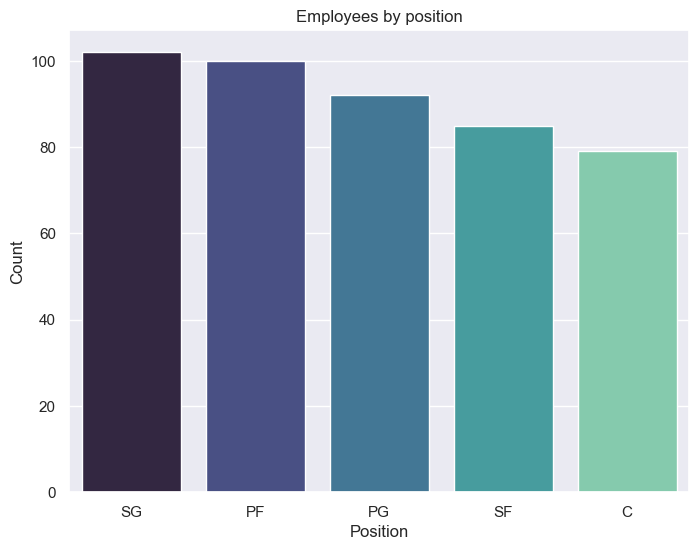

In [261]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Position',order=position_counts.index,palette='mako')
plt.title("Employees by position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()

In [265]:
bins=[20,25,30,35,40]
labels=['21-25','26-30','31-35','36-40']
df['Age Group']=pd.cut(df['Age'],bins=bins,labels=labels,right=False)


In [267]:
age_group_counts=df['Age Group'].value_counts().sort_index()
print(age_group_counts)


Age Group
21-25    152
26-30    182
31-35     90
36-40     29
Name: count, dtype: int64


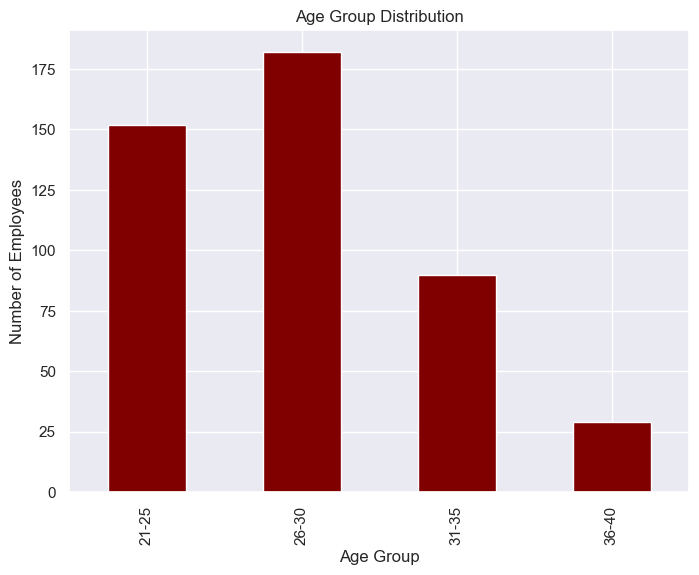

In [275]:
plt.figure(figsize=(8,6))
age_group_counts.plot(kind='bar',color='maroon')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.show()

In [283]:
df['Salary'].fillna(0,inplace=True)

team_salary=df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
print("Top team by salary:",team_salary.idxmax())

position_salary=df.groupby('Position')['Salary'].sum().sort_values(ascending=False)
print("Top position by salary",position_salary.idxmax())

Top team by salary: Cleveland Cavaliers
Top position by salary C


C:\Users\User\AppData\Local\Temp\ipykernel_19180\2791488722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(0,inplace=True)


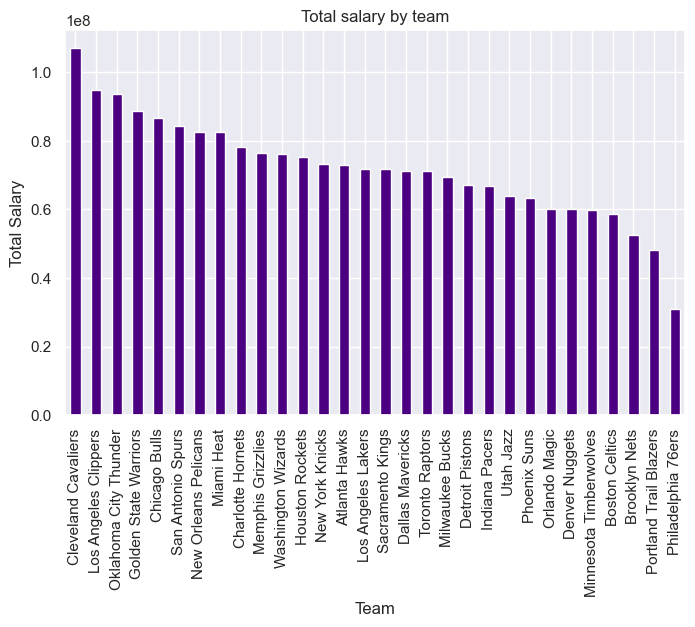

In [287]:
plt.figure(figsize=(8,5))
team_salary.plot(kind='bar',color='indigo')
plt.title("Total salary by team")
plt.ylabel("Total Salary")
plt.show()

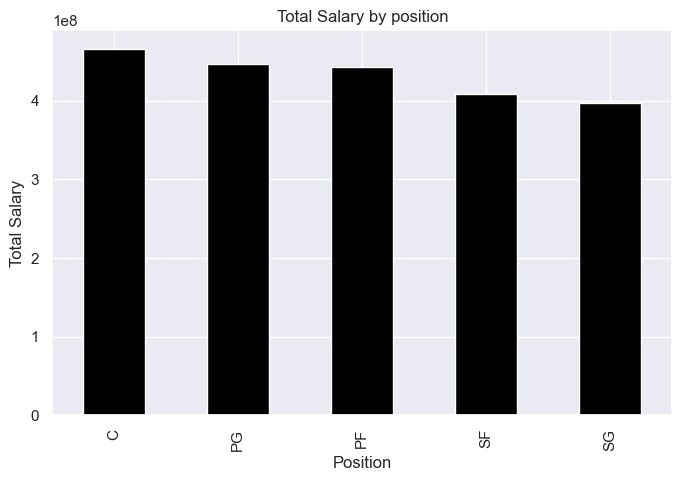

In [301]:
plt.figure(figsize=(8,5))
position_salary.plot(kind='bar', color='black')
plt.title("Total Salary by position")
plt.ylabel("Total Salary")
plt.show()

In [315]:
correlation=df[['Age','Salary']].corr()
print("Correlation between Age and Salary :")
print(correlation)

Correlation between Age and Salary :
            Age   Salary
Age     1.00000  0.20501
Salary  0.20501  1.00000
